 <h2>Name: Paul O'Donovan<br><br> Assignment 1 Data Structures & Algorithms</h2>

Firstly we need to import everything we will need to use in this notebook for this assignment.

In [56]:
import timeit   # import the timeit module for measuring running times
import matplotlib.pyplot as plt   # import the pyplot module from matplotlib for plotting
import time # import time to test runnning time of algorithms
import math #used for plotting worst case log graphs in Task 4
import numpy as np # for Task 5
from scipy.stats import linregress # for Task 5

<h3>Task 1</h3>
<h5>Write an algorithm to compute the factorial of a positive integer n.</h5> There are many different approaches we could use here but the below algorithm that we have decided to pick uses a loop to iterate over the values from 2 to n inclusive and multiply fact by each value. Therefore, it is an iterative algorithm. The loop multiplies i by fact on each iteration, and this operation takes constant time, therefore the time complexity of the loop is O(n).

In [57]:
# Define a function to calculate the factorial of a positive integer n

def factorial(n):
    # Initialize a variable named `fact` to 1
    fact = 1
    
    # If n is less than 0, return an error message indicating that n must be a positive integer
    if n < 0:
        return "n cannot be less than zero it needs to be a positive integer, please try again."
    
    # If n is 0 or 1, return 1
    elif n == 0 or n == 1:
        return 1
    
    # For i in the range from 2 to n , multiply fact by i
    else:
        for i in range(2, n+1):
            fact = fact * i
        
        # Return the final value of `fact`
        return fact

#test your algorithm
print(factorial(5))


120


<h4>Task 2</h4>
For different values of n, implement your algorithm using two
approaches: iterative and recursive (tail and non-tail
recursions). For each case, plot running time as a function of
n and compare the achieved results <br> For this step I plotted all three on the same graph so comparing would be easier.<br><br>

The time complexity of these three functions are all  O(n). 
The tail_recursion_fact is more space efficient than the recursion fact as it uses the a variable to keep results, it avoids the overhead of creating n stack frames.

It can be seen from the graph that the iterative approach always has the fastest running time and it is much faster than both recursive approaches. It is worth noting that the tail recursive function is slower than the recursive function.


iteration_fact - 
The time complexity is O(n). 
It has a space complexity of O(1) as it uses a constant amount of memory.

recursion_fact - 
The time complexity is O(n). 
It has a space complexity of O(n) as each recursive call adds to the call stack.

tail_recursion_fact - 
The time complexity is O(n). 
It has a space complexity of O(1) as it uses an accumulator to add to running total.

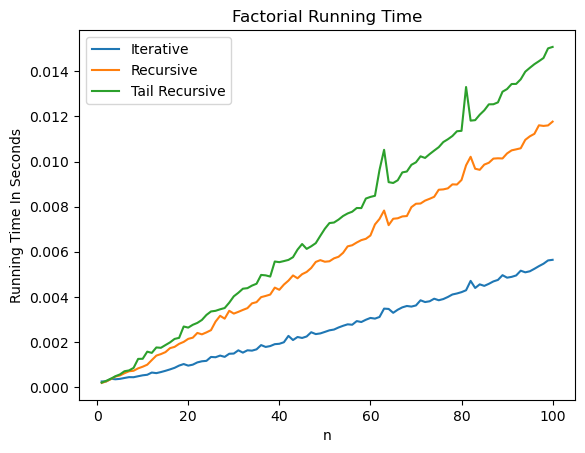

In [58]:
# Define the three different types of functions we will need;  iterative, non_tail and tail recursive functions 
def iteration_fact(n):
    """Calculate the factorial of n using an iterative approach."""
    fact = 1   # start with 1
    for i in range(1, n+1):   # multiply by each integer from 1 to n
        fact = fact * i
    return fact   

def recursion_fact(n):
    """Calculate the factorial of n using a recursive approach."""
    if n == 0:   # base case: 0! = 1
        return 1
    else:
        return n * recursion_fact(n-1)   # recursive case: n! = n * (n-1)!

def tail_recursion_fact(n, a=1):
    """Calculate the factorial of n using a tail-recursive approach."""
    if n == 0:   # base case: 0! = 1
        return a
    else:
        return tail_recursion_fact(n-1, n*a)   # recursive case with accumulator: n! = n * (n-1)!

# Set the range of n values
values_of_n = range(1, 101)

# Compute the running times for each approach
iteration_runtime = []
recursion_runtime = []
tail_recursion_runtime = []

for n in values_of_n:
    # Measure the running time of the iterative approach for n
    time = timeit.timeit(lambda: iteration_fact(n), number=1000)   # call iteration_fact(n) 1000 times and time it
    iteration_runtime.append(time)   # store the running time in the list iteration_runtime
    

    # Measure the running time of the recursive approach for n
    time = timeit.timeit(lambda: recursion_fact(n), number=1000)   # call recursion_fact(n) 1000 times and time it
    recursion_runtime.append(time)   # store the running time in the list recursion_runtime
    

    # Measure the running time of the tail-recursive approach for n
    time = timeit.timeit(lambda: tail_recursion_fact(n), number=1000)   # call tail_recursion_fact(n) 1000 times and time it
    tail_recursion_runtime.append(time)   # store the running time in the list tail_recursion_runtime


# Plot the running times for each approach on the same graph
plt.plot(values_of_n, iteration_runtime, label='Iterative')   # plot the iterative approach's running times
plt.plot(values_of_n, recursion_runtime, label='Recursive')   # plot the recursive approach's running times
plt.plot(values_of_n, tail_recursion_runtime, label='Tail Recursive')   # plot the tail-recursive approach's running times

plt.xlabel('n')   # label the x-axis as "n"
plt.ylabel('Running Time In Seconds')   # label the y-axis as "Running Time In Seconds"
plt.title('Factorial Running Time')   # set the title of the plot as "Factorial Running Time"
plt.legend()   # show the legend
plt.show()   # display the plot

<h4>Task 3</h4> Use one of the sequences obtained from task 2 as an input for
search algorithms. Implement with methods from: linear
search, iterative binary and recursive binary.<br>
For Task 3 as instructed in the assignment brief I created several sequences of different sizes to assess the performance of my search algorithms. <br>Firstly I test my algorithms for n in range 100, then in the range 10 and finally in the range 200.


From the below graph when were test for n in range 100 it can clearly be seen that the linear search takes the longest by a large margin as the n value increases.
Iterative binary is the fastest over the range 100 and recursive binary is slower than iterative binary but much faster than linear.

search_linear:
Time complexity: O(n)
Space complexity: O(1) - the algorithm only uses a fixed amount of memory for the loop index and constant number of variables regardless of amount of inputs.


search_binary_iteration:
Time complexity: O(log n) - each iteration it divides the search space in half, therefore its a search space of size 1 at worst case.
Space complexity: O(1) - only uses a constant amount of additional space to keep track of the left and right boundaries.

search_binary_recursion:
Time complexity: O(log n) - similar to the above search space is divided in half at each recursive call, resulting in a logarithmic number of recursive calls.
Space complexity: O(log n) - each recursive call adds a new frame to the call stack, maximum depth of the call stack is log n. So the space used by the call stack is proportional to log n.


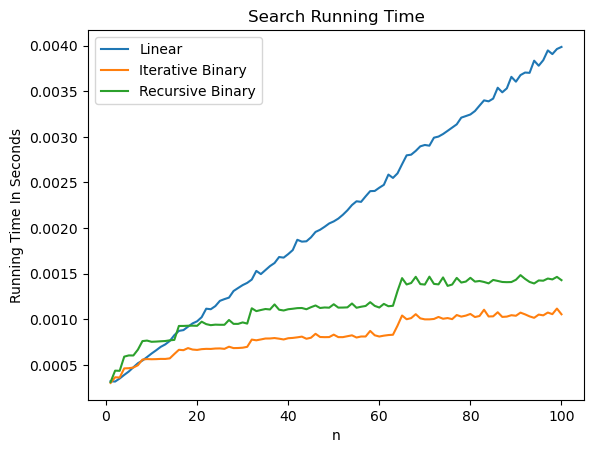

In [59]:
# For Linear, iterative_binary and recursive binary search define the search functions

def search_linear(seq, x):
    # Iterate through the sequence `seq` using a for loop
    for i in range(len(seq)):
        # Check if the current element is equal to the target value `x`
        if seq[i] == x:
            # If the element is found, return the index of the element
            return i
    # If the element is not found, return -1
    return -1

def search_binary_iteration(seq, x):
    
    # Initialize the left and right boundaries of the search space
    left = 0
    right = len(seq) - 1
    
    # Iterate until the left and right boundaries meet
    while left <= right:
        # Calculate the middle index of the search space
        mid = (left + right) // 2
        
        # If the middle element is less than `x`, update the left 
        if seq[mid] < x:
            left = mid + 1
        
        # If the middle element is greater than `x`, update the right 
        elif seq[mid] > x:
            right = mid - 1
        
        # If the middle element is equal to `x`, return the index of the element
        else:
            return mid
    
    # If the element is not found, return -1
    return -1

def search_binary_recursion(seq, x, left=0, right=None):
    # If `right` is not provided, initialize it to the last index of `seq`
    if right is None:
        right = len(seq) - 1
    
    # If the search space is empty, return -1
    if left > right:
        return -1
    
    # Calculate the middle index of the search space
    mid = (left + right) // 2
    
    # If the middle element is less than `x`, search the right half of the search space
    if seq[mid] < x:
        return search_binary_recursion(seq, x, mid+1, right)
    
    # If the middle element is greater than `x`, search the left half of the search space
    elif seq[mid] > x:
        return search_binary_recursion(seq, x, left, mid-1)
    
    # If the middle element is equal to `x`, return the index of the element
    else:
        return mid

# Set the range of n values
values_of_n = range(1, 101)

# Compute the running times for each function
iteration_runtime = []
recursion_runtime = []
tail_recursion_runtime = []

for n in values_of_n:
    
    time = timeit.timeit(lambda: iteration_fact(n), number=1000)
    iteration_runtime.append(time)
    
    
    time = timeit.timeit(lambda: recursion_fact(n), number=1000)
    recursion_runtime.append(time)
    
    
    time = timeit.timeit(lambda: tail_recursion_fact(n), number=1000)
    tail_recursion_runtime.append(time)


# Define the input sequence for the search functions (using the recursive factorial function)
seq = [recursion_fact(i) for i in range(1, values_of_n[-1]+1)]

# Compute the running times for each search function
runtimes_linear = []
iteration_runtime_binary = []
recursion_runtime_binary = []

for n in values_of_n:
    x = recursion_fact(n)
    
    time = timeit.timeit(lambda: search_linear(seq[:n], x), number=1000)
    runtimes_linear.append(time)
    
    time = timeit.timeit(lambda: search_binary_iteration(seq[:n], x), number=1000)
    iteration_runtime_binary.append(time)
    
    time = timeit.timeit(lambda: search_binary_recursion(seq[:n], x), number=1000)
    recursion_runtime_binary.append(time)

# Plot the running times for each search function on the same graph
plt.plot(values_of_n, runtimes_linear, label='Linear')
plt.plot(values_of_n, iteration_runtime_binary, label='Iterative Binary')
plt.plot(values_of_n, recursion_runtime_binary, label='Recursive Binary')

plt.xlabel('n')
plt.ylabel('Running Time In Seconds')
plt.title('Search Running Time')
plt.legend()
plt.show()

From the below graph when were test for n in range 10 the linear search starts the best with the recursive being the slowest. The smaller input shows us that it takes more n values to really see the speed of the algorithms.

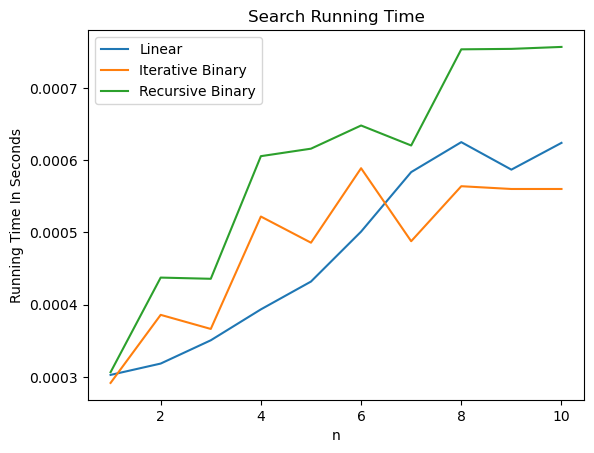

In [60]:

#Set the range of n values
values_of_n = range(1, 11) # n values from 1 to 10

#Compute the running times for each factorial function
iteration_runtime = []
recursion_runtime = []
tail_recursion_runtime = []

for n in values_of_n:
    time = timeit.timeit(lambda: iteration_fact(n), number=1000)
    iteration_runtime.append(time)
    
    time = timeit.timeit(lambda: recursion_fact(n), number=1000)
    recursion_runtime.append(time)
    
    time = timeit.timeit(lambda: tail_recursion_fact(n), number=1000)
    tail_recursion_runtime.append(time)

#Define the input sequence for the search functions (using the recursive factorial function)
seq = [recursion_fact(i) for i in range(1, values_of_n[-1]+1)]

#Compute the running times for each search function
runtimes_linear = []
iteration_runtime_binary = []
recursion_runtime_binary = []

for n in values_of_n:
    
    x = recursion_fact(n)
    
    time = timeit.timeit(lambda: search_linear(seq[:n], x), number=1000)
    runtimes_linear.append(time)
    

    time = timeit.timeit(lambda: search_binary_iteration(seq[:n], x), number=1000)
    iteration_runtime_binary.append(time)
    

    time = timeit.timeit(lambda: search_binary_recursion(seq[:n], x), number=1000)
    recursion_runtime_binary.append(time)


#Plot the running times for each search function on the same graph
plt.plot(values_of_n, runtimes_linear, label='Linear')
plt.plot(values_of_n, iteration_runtime_binary, label='Iterative Binary')
plt.plot(values_of_n, recursion_runtime_binary, label='Recursive Binary')

plt.xlabel('n')
plt.ylabel('Running Time In Seconds')
plt.title('Search Running Time')
plt.legend()
plt.show()

In the below its even clearer than the linear approach is by far the slowest of the three. The strength of the iterative and binary can really be seen when the n value rises. They are relatively close but the iterative is still quite a bit faster than the recursive.

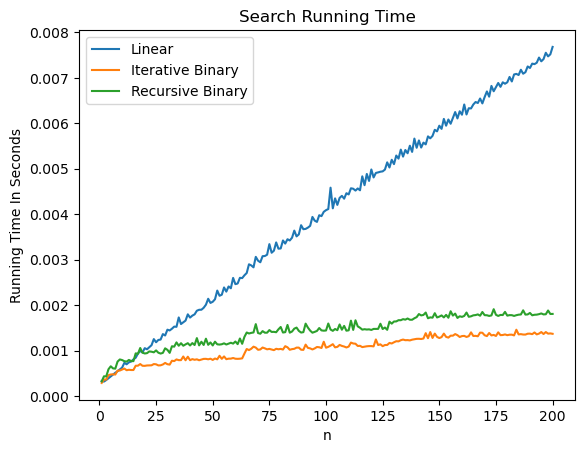

In [61]:
# Set the range of n values
values_of_n = range(1, 201)


# Compute the running times for each factorial function
iteration_runtime = []
recursion_runtime = []
tail_recursion_runtime = []


for n in values_of_n:
    
    time = timeit.timeit(lambda: iteration_fact(n), number=1000)
    iteration_runtime.append(time)
    

    time = timeit.timeit(lambda: recursion_fact(n), number=1000)
    recursion_runtime.append(time)
    

    time = timeit.timeit(lambda: tail_recursion_fact(n), number=1000)
    tail_recursion_runtime.append(time)


# Define the input sequence for the search functions (using the recursive factorial function)
seq = [recursion_fact(i) for i in range(1, values_of_n[-1]+1)]


# Compute the running times for each search function
runtimes_linear = []
iteration_runtime_binary = []
recursion_runtime_binary = []


for n in values_of_n:
    
    x = recursion_fact(n)
    

    time = timeit.timeit(lambda: search_linear(seq[:n], x), number=1000)
    runtimes_linear.append(time)
    

    time = timeit.timeit(lambda: search_binary_iteration(seq[:n], x), number=1000)
    iteration_runtime_binary.append(time)
    

    time = timeit.timeit(lambda: search_binary_recursion(seq[:n], x), number=1000)
    recursion_runtime_binary.append(time)

# Plot the running times for each search function on the same graph
plt.plot(values_of_n, runtimes_linear, label='Linear')
plt.plot(values_of_n, iteration_runtime_binary, label='Iterative Binary')
plt.plot(values_of_n, recursion_runtime_binary, label='Recursive Binary')

plt.xlabel('n')
plt.ylabel('Running Time In Seconds')
plt.title('Search Running Time')
plt.legend()
plt.show()

<h3>Task 4 Computation of best and worst running times for search algorithms</h3>

<br> <p>Below are the best and worst case running times. I have also plotted the best and worst running times for each below.</p>
<h4>Linear search</h4>
- Best case: the element is found in the first position. O(1)<br>
- Worst case: the element is not in the sequence. O(n)<br>

<h4>Iterative binary search</h4>
- Best case: the element is in the middle of the sequence. O(1)<br>
-Worst case: the element is not in the sequence. O(log n)<br> 

<h4>Recursive binary search</h4>
- Best case: the element is in the middle of the sequence. O(1)<br>
- Worst case: the element is not in the sequence. O(log n)


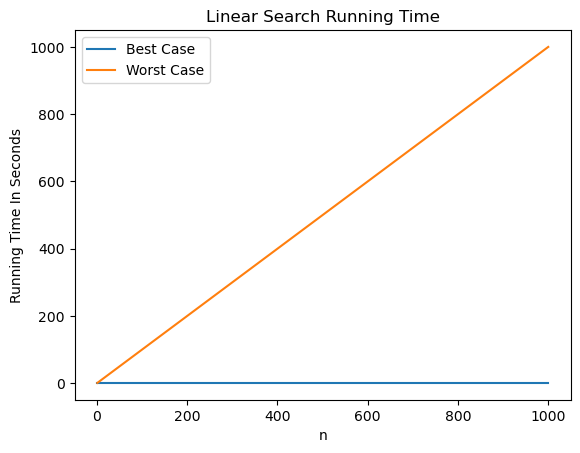

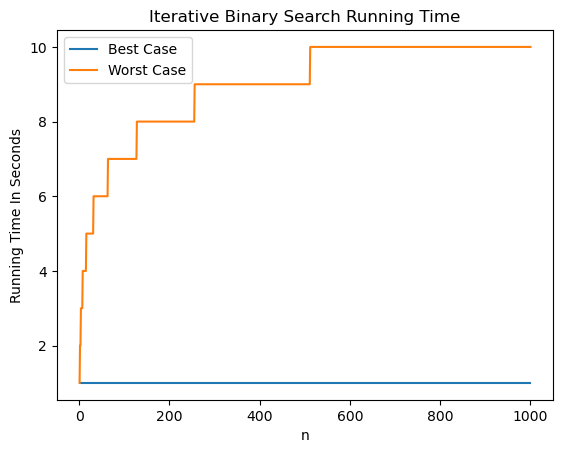

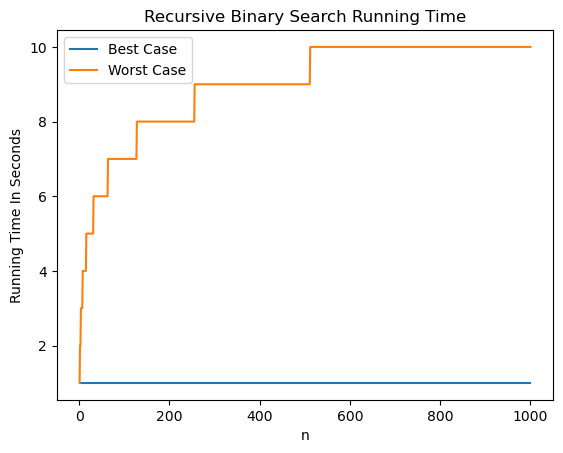

In [62]:
# Set the range of n values
values_of_n = range(1, 1001)

# Define the input sequence for the search function
seq = list(range(1, values_of_n[-1]+1))

# Compute the running times for each value of n
run_times = []
best_case = []
worst_case = []

for n in values_of_n:
    x = n
    time = timeit.timeit(lambda: search_linear(seq[:n], x), number=1000)
    run_times.append(time)
    best_case.append(1)
    worst_case.append(n)

# Plot the running times
plt.plot(values_of_n, best_case, label='Best Case')
plt.plot(values_of_n, worst_case, label='Worst Case')
plt.xlabel('n')
plt.ylabel('Running Time In Seconds')
plt.title('Linear Search Running Time')
plt.legend()
plt.show()



# Compute the running times for each value of n
run_times = []
best_case = []
worst_case = []
for n in values_of_n:
    x = n
    time = timeit.timeit(lambda: search_binary_iteration(seq[:n], x), number=1000)
    run_times.append(time)
    best_case.append(1)
    worst_case.append(1 + int(math.log2(n)))

# Plot the running times
plt.plot(values_of_n, best_case, label='Best Case')
plt.plot(values_of_n, worst_case, label='Worst Case')
plt.xlabel('n')
plt.ylabel('Running Time In Seconds')
plt.title('Iterative Binary Search Running Time')
plt.legend()
plt.show()



# Compute the running times for each value of n
run_times = []
best_case = []
worst_case = []

for n in values_of_n:
    x = n
    time = timeit.timeit(lambda: search_binary_recursion(seq[:n], x), number=1000)
    run_times.append(time)
    best_case.append(1)
    worst_case.append(1 + int(math.log2(n)))

# Plot the running times
plt.plot(values_of_n, best_case, label='Best Case')
plt.plot(values_of_n, worst_case, label='Worst Case')
plt.xlabel('n')
plt.ylabel('Running Time In Seconds')
plt.title('Recursive Binary Search Running Time')
plt.legend()
plt.show()

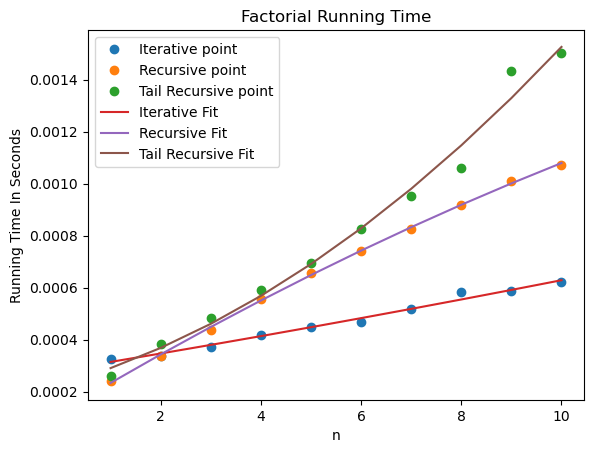

Iterative fit line equation = -0.00000075x^2 + 0.000040x + 0.000183
Iterative slope: -7.529659507616131e-07
Recursive fit line equation = 0.00000134x^2 + 0.000068x + 0.000111
Recursive slope: 1.338712122973943e-06
Tail recursive fit line equation = 0.00000899x^2 + 0.000020x + 0.000190
Tail recursive slope: 8.99256824457994e-06


In [73]:
# Set the range of n values
values_of_n = range(1, 11)

# Compute the running times for each approach
iteration_runtime = []
recursion_runtime = []
tail_recursion_runtime = []

for n in values_of_n: 
    # Measure the running time of iteration_fact for n
    time = timeit.timeit(lambda: iteration_fact(n), number=1000)
    iteration_runtime.append(time)
    
    # Measure the running time of recursion_fact for n
    time = timeit.timeit(lambda: recursion_fact(n), number=1000)
    recursion_runtime.append(time)
    
    # Measure the running time of tail_recursion_fact for n
    time = timeit.timeit(lambda: tail_recursion_fact(n), number=1000)
    tail_recursion_runtime.append(time)

#Perform curve fitting on the data using quadratic functions
#Fit a polynomial curve to the data using numpy.polyfit

iteration_fitting = np.polyfit(values_of_n, iteration_runtime, deg=2) # arrays containing the polynomial coefficients for each fit
recursion_fitting = np.polyfit(values_of_n, recursion_runtime, deg=2)
tail_recursion_fitting = np.polyfit(values_of_n, tail_recursion_runtime, deg=2) #deg=2 specifies a second-order polynomial (quadratic) fit, which is suitable for this data

# function that returns evenly spaced numbers over a specified interval.
n_fit = np.linspace(1, 10, 10) #  This array is used later to evaluate the fitted curves at these values using the np.polyval() function.

# Evaluate the fitted curves at the n_fit values 
iteration_runtime_fit = np.polyval(iteration_fitting, n_fit)
recursion_runtime_fit = np.polyval(recursion_fitting, n_fit)
tail_recursion_runtime_fit = np.polyval(tail_recursion_fitting, n_fit)

# Plot the original data and the fitted curves
plt.plot(values_of_n, iteration_runtime, 'o', label='Iterative point')
plt.plot(values_of_n, recursion_runtime, 'o', label='Recursive point')
plt.plot(values_of_n, tail_recursion_runtime, 'o', label='Tail Recursive point')
plt.plot(n_fit, iteration_runtime_fit, label='Iterative Fit')
plt.plot(n_fit, recursion_runtime_fit, label='Recursive Fit')
plt.plot(n_fit, tail_recursion_runtime_fit, label='Tail Recursive Fit')
plt.xlabel('n')
plt.ylabel('Running Time In Seconds')
plt.title('Factorial Running Time')
plt.legend()
plt.show()




# Compute the running times for each approach
iteration_runtime = []
recursion_runtime = []
tail_recursion_runtime = []

for n in values_of_n:

    time = timeit.timeit(lambda: iteration_fact(n), number=1000)
    iteration_runtime.append(time)
    

    time = timeit.timeit(lambda: recursion_fact(n), number=1000)
    recursion_runtime.append(time)
    
    
    time = timeit.timeit(lambda: tail_recursion_fact(n), number=1000)
    tail_recursion_runtime.append(time)

# Perform curve fitting on the data
iteration_fitting = np.polyfit(values_of_n, iteration_runtime, deg=2)
recursion_fitting = np.polyfit(values_of_n, recursion_runtime, deg=2)
tail_recursion_fitting = np.polyfit(values_of_n, tail_recursion_runtime, deg=2)

# Get the slopes of the fitted curves
slope_iterative = iteration_fitting[0]
slope_recursive = recursion_fitting[0]
slope_tail_recursive = tail_recursion_fitting[0]

# Get the coefficients of the quadratic function
a, b, c = iteration_fitting

# Print the equation of the fitted curve
print(f"Iterative fit line equation = {a:.8f}x^2 + {b:.6f}x + {c:.6f}")
print("Iterative slope:", slope_iterative)

# Get the coefficients of the quadratic function
a, b, c = recursion_fitting

# Print the equation of the fitted curve
print(f"Recursive fit line equation = {a:.8f}x^2 + {b:.6f}x + {c:.6f}")
print("Recursive slope:", slope_recursive)

# Get the coefficients of the quadratic function
a, b, c = tail_recursion_fitting

# Print the equation of the fitted curve
print(f"Tail recursive fit line equation = {a:.8f}x^2 + {b:.6f}x + {c:.6f}")
print("Tail recursive slope:", slope_tail_recursive)

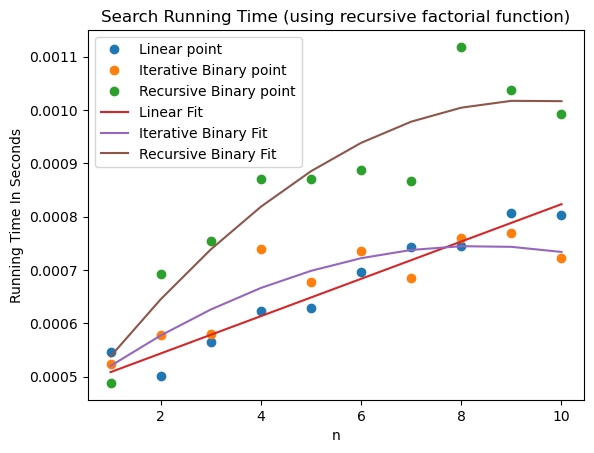

Linear fit line equation = 0.00003499a + 0.00047355b 
Linear fit slope: 3.498787264106795e-05
Iterative binary fit line equation = -0.00000416x^2 + 0.00006952x + 0.00045486
Iterative binary fit slope: -4.161946917795863e-06
Recursion binary fit line equation = -0.00000673x^2 + 0.00012715x + 0.00041764
Recursive binary fit slope: -6.725503942906283e-06


In [79]:
# Compute the running times for each search function
runtimes_linear = []
iteration_runtime_binary = []
recursion_runtime_binary = []

for n in values_of_n:
    x = recursion_fact(n)
    time = timeit.timeit(lambda: search_linear(seq[:n], x), number=1000)
    runtimes_linear.append(time)
    
    time = timeit.timeit(lambda: search_binary_iteration(seq[:n], x), number=1000)
    iteration_runtime_binary.append(time)
    
    time = timeit.timeit(lambda: search_binary_recursion(seq[:n], x), number=1000)
    recursion_runtime_binary.append(time)

# Perform curve fitting on the data using numpy.polyfit()
fit_linear = np.polyfit(values_of_n, runtimes_linear, deg=1)
iteration_fitting_binary = np.polyfit(values_of_n, iteration_runtime_binary, deg=2)
recursion_fitting_binary = np.polyfit(values_of_n, recursion_runtime_binary, deg=2)

# Create a range of n values for the fitted curves
n_fit = np.linspace(1, 10, 10)

# Evaluate the fitted curves at the n_fit values
runtimes_linear_fit = np.polyval(fit_linear, n_fit)
iteration_runtime_binary_fit = np.polyval(iteration_fitting_binary, n_fit)
recursion_runtime_binary_fit = np.polyval(recursion_fitting_binary, n_fit)



# Plot the original data and the fitted curves
plt.plot(values_of_n, runtimes_linear, 'o', label='Linear point')
plt.plot(values_of_n, iteration_runtime_binary, 'o', label='Iterative Binary point')
plt.plot(values_of_n, recursion_runtime_binary, 'o', label='Recursive Binary point')
plt.plot(n_fit, runtimes_linear_fit, label='Linear Fit')
plt.plot(n_fit, iteration_runtime_binary_fit, label='Iterative Binary Fit')
plt.plot(n_fit, recursion_runtime_binary_fit, label='Recursive Binary Fit')
plt.xlabel('n')
plt.ylabel('Running Time In Seconds')
plt.title('Search Running Time (using recursive factorial function)')
plt.legend()
plt.show()



# Get the coefficients of the function
a, b = fit_linear

# Print the equation of the fitted line
print(f"Linear fit line equation = {a:.8f}a + {b:.8f}b ")
print("Linear fit slope:", fit_linear[0])

# Get the coefficients of the quadratic function
a, b, c = iteration_fitting_binary

# Print the equation of the fitted curve
print(f"Iterative binary fit line equation = {a:.8f}x^2 + {b:.8f}x + {c:.8f}")
print("Iterative binary fit slope:", iteration_fitting_binary[0])

# Get the coefficients of the quadratic function
a, b, c = recursion_fitting_binary

# Print the equation of the fitted curve
print(f"Recursion binary fit line equation = {a:.8f}x^2 + {b:.8f}x + {c:.8f}")
print("Recursive binary fit slope:", recursion_fitting_binary[0])


